# MIDSEM LAB EXAM (CS306: Machine Learning)

## Required Libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Import Dataset (excluding label column)

In [14]:
iris_data = pd.read_csv('iris.csv') 
X = iris_data.drop(columns=['Species']).values 

## K-Mean clustering

In [15]:
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

## (a) Performance, No. of clusters (K-Means) 

Number of clusters: 1, Inertia: 281918.3244
Number of clusters: 2, Inertia: 70649.3547
Number of clusters: 3, Inertia: 31365.5897
Number of clusters: 4, Inertia: 17872.3597
Number of clusters: 5, Inertia: 11598.2844
Number of clusters: 6, Inertia: 8063.3503
Number of clusters: 7, Inertia: 5945.0788
Number of clusters: 8, Inertia: 4595.6236
Number of clusters: 9, Inertia: 3627.1321
Number of clusters: 10, Inertia: 3162.4814


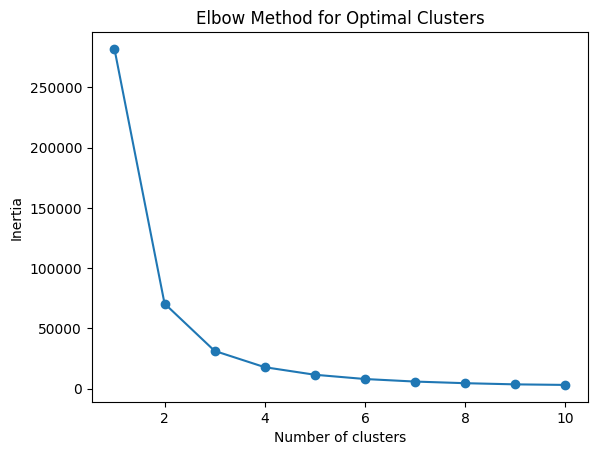

In [16]:
def calculate_inertia(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

def elbow_method(X, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        labels, centroids = kmeans(X, k)
        inertia = calculate_inertia(X, labels, centroids)
        inertias.append(inertia)
        print(f'Number of clusters: {k}, Inertia: {inertia:.4f}')
    return inertias

inertias = elbow_method(X, max_k=10)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [17]:
k = 3
labels, centroids = kmeans(X, k)

## (b) Logistic Regression

Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 1.0000
The model is neither overfitting nor underfitting.


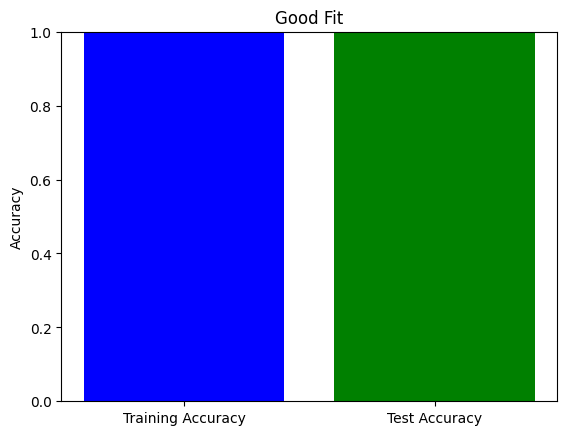

In [18]:
def select_closest_samples(X, labels, centroids, n=25):
    selected_samples = []
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        distances = np.sqrt(((cluster_points - centroids[i])**2).sum(axis=1))
        closest_indices = np.argsort(distances)[:n]
        selected_samples.append(cluster_points[closest_indices])
    return np.vstack(selected_samples)

selected_samples = select_closest_samples(X, labels, centroids, n=25)

selected_labels = np.concatenate([np.full(25, i) for i in range(k)])
X_train, X_test, y_train, y_test = train_test_split(selected_samples, selected_labels, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

log_reg = grid_search.best_estimator_
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

if train_accuracy > test_accuracy:
    if test_accuracy < 0.5:
        print("The model is underfitting.")
        plt.title("Underfitting Detected")
    else:
        print("The model is slightly overfitting but acceptable.")
        plt.title("Slight Overfitting")
else:
    print("The model is neither overfitting nor underfitting.")
    plt.title("Good Fit")

accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()